# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


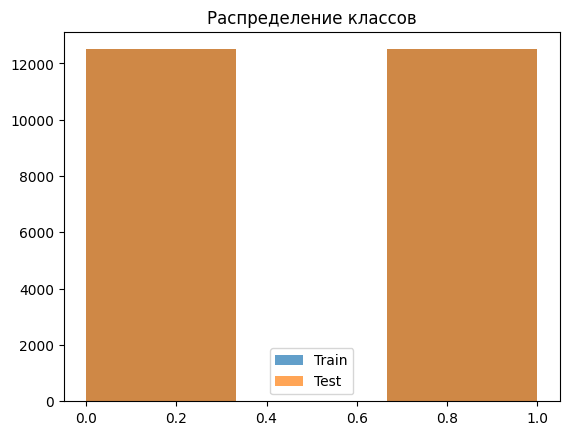

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
train, test = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
x_train, y_train = [], []
x_test, y_test = [], []

for text, label in tfds.as_numpy(train):
    x_train.append(text)
    y_train.append(label)

for text, label in tfds.as_numpy(test):
    x_test.append(text)
    y_test.append(label)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [5]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
vectorizer = keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=200)

# 4. Адаптируйте векторзатор на тренировочных текстах
vectorizer.adapt(x_train)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [6]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)
model = keras.Sequential([
    keras.layers.Input((200,)),
    keras.layers.Embedding(10000, 128),
    keras.layers.Conv1D(64, 5, activation='relu'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, 'relu'),
    keras.layers.Dense(1, 'sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - Precision: 0.6712 - Recall: 0.7164 - accuracy: 0.6861 - loss: 0.5558 - val_Precision: 0.8168 - val_Recall: 0.9091 - val_accuracy: 0.8508 - val_loss: 0.3356
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - Precision: 0.9218 - Recall: 0.9255 - accuracy: 0.9243 - loss: 0.2036 - val_Precision: 0.8683 - val_Recall: 0.8755 - val_accuracy: 0.8698 - val_loss: 0.3181
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - Precision: 0.9889 - Recall: 0.9879 - accuracy: 0.9885 - loss: 0.0490 - val_Precision: 0.8591 - val_Recall: 0.8795 - val_accuracy: 0.8660 - val_loss: 0.3888
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - Precision: 0.9994 - Recall: 0.9996 - accuracy: 0.9995 - loss: 0.0079 - val_Precision: 0.8650 - val_Recall: 0.8807 - val_accuracy: 0.8700 - val_loss: 0.4507
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 8.9378e-04 - val_Precision: 0.8655 - va

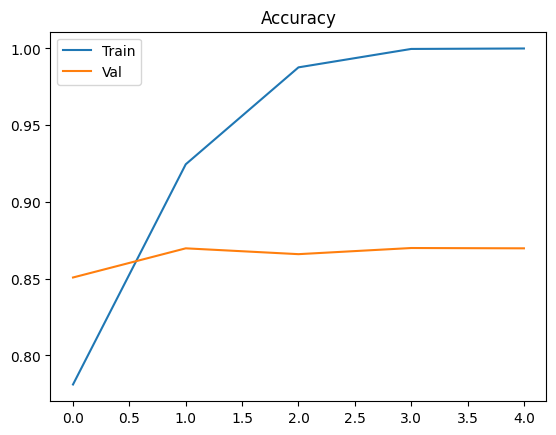

In [7]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
### ВАШ КОД ЗДЕСЬ ###
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
### ВАШ КОД ЗДЕСЬ ###
history = model.fit(x_train_vec, y_train,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=32)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

## БЛОК 5: Оценка

In [9]:
# 10. Оцените модель на тестовых данных
### ВАШ КОД ЗДЕСЬ ###
test_loss, test_acc, test_prec, test_rec = model.evaluate(x_test_vec, y_test)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"
    ### ВАШ КОД ЗДЕСЬ ###
    pred_prob = model.predict(vectorizer(text).numpy().reshape(1, -1)) # Векторизую и изменяю форму, чтобы совпадало со входом модели
    pred_label = "POS" if pred_prob > 0.5 else "NEG"
    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - Precision: 0.8628 - Recall: 0.8637 - accuracy: 0.8638 - loss: 0.5187
Тестовая accuracy: 0.8633
Тестовая precision: 0.8641
Тестовая recall: 0.8622
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
b'There are films that make careers. For George Rome'... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
b'A blackly comic tale of a down-trodden priest, Naz'... | True: POS | Pred: POS (0.97)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
b'Scary Movie 1-4, Epic Movie, Date Movie, Meet the '... | True: NEG | Pred: NEG (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
b'Poor Shirley MacLaine tries hard to lend some grav'... | True: NEG | Pred: NEG (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
b'As a former Erasmus student I enjoyed this film ve'... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
b'My God, Ryan Gosling has made a lot of deep charac'... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
b'This film ju

## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1.  Итоговая точность: 0.8633
2.  Точность на тренировочной гораздо выше, чем на валидационной, есть переобучение
3.  Последний отзыв классифицирован неверно, этот отзыв лексически смешанный, есть фрагменты, которые в отрыве от других могут восприниматься как негативные